In this problem i scraaped a data from a public website to sell properties or any thing u want 
i scrapped the appartments in cairo with its districts to predict the good price with the apartment features to list it 

In [2]:
import joblib
import time
import mysql.connector
from datetime import -
from dateutil.relativedelta import relativedelta
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

In [2]:
ads,url_stack=joblib.load('state.pkl')


In [3]:

df=pd.DataFrame.from_records(ads)
df

# df = pd.read_csv('olx_data_36K_V2.csv')
# df

,url,title,date,Location,Compound,Type,Price,Area (m²),Bedrooms,Level,Furnished,Price Type,Bathrooms,Payment Option,Description,Amenities,Delivery Term,Delivery Date,Down Payment
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2 months ago,New Cairo - El Tagamoa,2020 Compound,Apartment,"175,000",115,3,3,No,Price,1,Cash,شقة لقطة للبيع بسكن مصر الاندلس دور متكرر فيو ...,Landline; Natural Gas; Water Meter; Electricit...,NaN,NaN,NaN
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2 weeks ago,New Cairo - El Tagamoa,NaN,Apartment,"180,000",115,3,1,No,Price,1,Cash,للبيع دور اول\nفيو تحفه\nالأوفر ١٨٠ الف لسرعه ...,Natural Gas; Water Meter; Electricity Meter; S...,Finished,Ready to move,NaN
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,1 month ago,New Cairo - El Tagamoa,NaN,Apartment,"150,000",115,3,2,No,Price,1,Cash,للبيت شقه سكن مصر التجمع التالت مسلسل 9\nمرحله...,NaN,Finished,Ready to move,NaN
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2 days ago,New Cairo - El Tagamoa,NaN,Apartment,"450,000",135,3,7,No,Negotiable,1,Cash,شقة عبارة عن نصف دور بها عدد 3 جهاز تكييف وسخا...,Elevator; Natural Gas; Balcony,Finished,Ready to move,NaN
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,1 month ago,New Cairo - El Tagamoa,NaN,Apartment,"160,000",115,3,2,No,Price,1,Cash,لقطه لسرعه البيع شقه سكن مصر التجمع التالت مسل...,NaN,Finished,Ready to move,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,1 month ago,15 May City,NaN,Apartment,"550,000",125,3,2,NaN,Negotiable,1,NaN,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م \...,NaN,Core & Shell,Ready to move,NaN
37705,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بكمبوند دار مصر دور ثالث,1 week ago,15 May City,Dar Misr,Apartment,"600,000",140,3,3,No,Negotiable,3,NaN,شقة للبيع بكمبوند دار مصر 15 مايو دور ثالث بحر...,NaN,Finished,Ready to move,"600,000"
37706,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2 months ago,15 May City,NaN,Apartment,"470,000",80,2,5,No,Negotiable,1,Cash,شقه للبيع بارقي مكان بالإسكندرية أبراج رمادا ب...,Elevator; Natural Gas; Water Meter; Electricit...,Finished,Ready to move,NaN
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2 months ago,15 May City,NaN,Apartment,"470,000",100,2,4,No,Price,1,Cash,شقة للبيع بمدينة ١٥ مايو مجاورة ٥ \nقريبة من ج...,Landline; Water Meter; Electricity Meter; Pets...,Finished,Ready to move,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             37709 non-null  object
 1   title           37709 non-null  object
 2   date            37709 non-null  object
 3   Location        37709 non-null  object
 4   Compound        13610 non-null  object
 5   Type            37709 non-null  object
 6   Price           37709 non-null  object
 7   Area (m²)       37709 non-null  object
 8   Bedrooms        37709 non-null  object
 9   Level           37709 non-null  object
 10  Furnished       28677 non-null  object
 11  Price Type      37709 non-null  object
 12  Bathrooms       37709 non-null  object
 13  Payment Option  33569 non-null  object
 14  Description     37709 non-null  object
 15  Amenities       28301 non-null  object
 16  Delivery Term   25879 non-null  object
 17  Delivery Date   28539 non-null  object
 18  Down P

# Filling missing Values  loading
all missing values filling written here

In [5]:
df['Delivery Term'].replace('Finished',1, inplace=True)
df['Delivery Term'].replace('Not Finished',0 ,inplace = True)
df['Delivery Term'].replace('Semi Finished',0.5 ,inplace = True)
df['Delivery Term'].replace('Core & Shell',0.75 ,inplace = True)
df['Delivery Term'].unique()

array([ nan, 1.  , 0.  , 0.5 , 0.75])

In [6]:
# df['amenities'].isna().sum()
imputer = SimpleImputer(strategy='constant',fill_value='')

imputer2 = SimpleImputer(strategy='constant',fill_value='Cash')
imputer3 = SimpleImputer(strategy='constant',fill_value='Ready to move')
imputer4 = SimpleImputer(strategy='constant',fill_value=0)
imputer5 = SimpleImputer(strategy='most_frequent')
imputer6 = KNNImputer(n_neighbors=4)

df[['Amenities']] = imputer.fit_transform(df[['Amenities']])
df[['Delivery Date']] = imputer3.fit_transform(df[['Delivery Date']])
df[['Down Payment']] = imputer4.fit_transform(df[['Down Payment']])
df[['Furnished']] = imputer5.fit_transform(df[['Furnished']])

df[['Delivery Term']] = imputer6.fit_transform(df[['Delivery Term']])
df[['Payment Option']] = imputer2.fit_transform(df[['Payment Option']])

payment option converting 0 to 'Cash'

In [7]:
df[df['Payment Option']==0]='Cash'

In [8]:
df['Payment Option'].unique()

array(['Cash', 'Installment', 'Cash or Installment'], dtype=object)

Down payment conversion from string to int 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   url             37709 non-null  object
 1   title           37709 non-null  object
 2   date            37709 non-null  object
 3   Location        37709 non-null  object
 4   Compound        13610 non-null  object
 5   Type            37709 non-null  object
 6   Price           37709 non-null  object
 7   Area (m²)       37709 non-null  object
 8   Bedrooms        37709 non-null  object
 9   Level           37709 non-null  object
 10  Furnished       37709 non-null  object
 11  Price Type      37709 non-null  object
 12  Bathrooms       37709 non-null  object
 13  Payment Option  37709 non-null  object
 14  Description     37709 non-null  object
 15  Amenities       37709 non-null  object
 16  Delivery Term   37709 non-null  object
 17  Delivery Date   37709 non-null  object
 18  Down P

In [10]:
df["Down Payment"] = [float(str(i).replace(",", "")) for i in df["Down Payment"]]
df['Down Payment']=df['Down Payment'].astype(int)

In [11]:
df['Delivery Term'].astype(str)
df['Delivery Term'].replace(1,'Finished', inplace=True)
df['Delivery Term'].replace(0,'Not Finished' ,inplace = True)
df['Delivery Term'].replace(0.5,'Semi Finished' ,inplace = True)
df['Delivery Term'].replace(0.75,'Core & Shell' ,inplace = True)
df['Delivery Term'].replace(0.7807295490552185,'Core & Shell',inplace = True)


Replacing Highest with 10+

In [12]:
df['Level'].replace('Highest','10+',inplace=True)


In [13]:
df['Delivery Term'].value_counts()

Finished         15325
Core & Shell     12972
Semi Finished     8046
Not Finished      1366
Name: Delivery Term, dtype: int64

In [14]:
df['Amenities'].isna().sum()


0

# amenities

In [15]:
list_ament=['Electricity Meter', 'Balcony','Water Meter','Elevator',
            'Security','Natural Gas','Landline','Pets Allowed','Covered Parking',
            'Private Garden','Pool','Maids Room','Central A/C & heating',
            'Built in Kitchen Appliances']

ls1 = ['مياة', 'عداد كهرباء','غاز','تكييف مركزي','مصعد','حمام سباحه','جاردن','بلكونة']
ls2 = ['Water Meter', 'Electricity Meter', 'Natural Gas','Central A/C & heating','Elevator','Pool','Private Garden','Balcony']
mny_map = dict(zip(ls2, ls1))

def remove(row, col):
    if col in row['review'] :
        return ""
    else:
        return col

for col in Stop_words:
    df[col] = df.apply(romove, args=[col], axis=1) 

In [16]:
mny_map.get('Water Meter','none')

'مياة'

In [17]:
for x in list_ament:
    df[x]=df[x].replace(True,1)
    df[x]=df[x].replace(False,0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37709 entries, 0 to 37708
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          37709 non-null  object
 1   title                        37709 non-null  object
 2   date                         37709 non-null  object
 3   Location                     37709 non-null  object
 4   Compound                     13610 non-null  object
 5   Type                         37709 non-null  object
 6   Price                        37709 non-null  object
 7   Area (m²)                    37709 non-null  object
 8   Bedrooms                     37709 non-null  object
 9   Level                        37709 non-null  object
 10  Furnished                    37709 non-null  object
 11  Price Type                   37709 non-null  object
 12  Bathrooms                    37709 non-null  object
 13  Payment Option               37

In [18]:
df['Water Meter'].value_counts()

1    19901
0    17808
Name: Water Meter, dtype: int64

In [19]:
df.rename({'Area_(m²)': 'Area'},inplace=True)
df.columns = df.columns.str.replace(' ','_')
df.rename(columns = {'area_(m²)':'Area','central_a/c_&_heating':'Central_AC_heating'}, inplace = True)
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          37709 non-null  object
 1   title                        37709 non-null  object
 2   date                         37709 non-null  object
 3   location                     37709 non-null  object
 4   compound                     13610 non-null  object
 5   type                         37709 non-null  object
 6   price                        37709 non-null  object
 7   area_(m²)                    37709 non-null  object
 8   bedrooms                     37709 non-null  object
 9   level                        37709 non-null  object
 10  furnished                    37709 non-null  object
 11  price_type                   37709 non-null  object
 12  bathrooms                    37709 non-null  object
 13  payment_option               37

In [20]:
df.rename({'Area_(m²)': 'Area'},inplace=True)
df.columns = df.columns.str.replace(' ','_')
df.rename(columns = {'area_(m²)':'Area','central_a/c_&_heating':'Central_AC_heating'}, inplace = True)
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          37709 non-null  object
 1   title                        37709 non-null  object
 2   date                         37709 non-null  object
 3   location                     37709 non-null  object
 4   compound                     13610 non-null  object
 5   type                         37709 non-null  object
 6   price                        37709 non-null  object
 7   area                         37709 non-null  object
 8   bedrooms                     37709 non-null  object
 9   level                        37709 non-null  object
 10  furnished                    37709 non-null  object
 11  price_type                   37709 non-null  object
 12  bathrooms                    37709 non-null  object
 13  payment_option               37

# Compound

In [21]:
lse=list(df['compound'].unique())
lsa=[]
del lse[5]

In [22]:
del lse[1]

translate all compounds to arabic to search compound names in the describtion 

In [23]:
from deep_translator import GoogleTranslator
for i in lse:
    try:
        result = GoogleTranslator('auto','arabic').translate(i)
        lsa.append(result)
        #print(result)
    except:
        print('sorry')

make dictionary for every english compound name to its arabic value

In [24]:
c_map = dict(zip(lse, lsa))
c_map

{'2020 Compound': 'كمبوند 2020',
 'Dar Misr': 'Dar Misr',
 'ALBA': 'ألبا',
 'Upville': 'أبفيل',
 'Andalus': 'الأندلس',
 'Zahret El Tagamo': 'زهرة التجمع',
 'Haram City': 'مدينة الهرم',
 'Al Diyar': 'Al Diyar',
 'Nakheel': 'Nakheel',
 'Light City': 'لايت سيتي',
 'Madinaty': 'مدينتي',
 'Stone Residence': 'ستون ريزيدنس',
 'Galleria Moon Valley': 'جاليريا مون فالى',
 'Amorada': 'أموردا',
 'Fifth Square': 'فيفث سكوير',
 'Al Burouj': 'Al Burouj',
 'Dreamland': 'ارض الاحلام',
 'Eastown': 'ايستاون',
 'Jayd': 'Jayd',
 'The Address East': 'العنوان الشرقي',
 'Al Riyadh Secon': 'Al Riyadh Secon',
 'Makany': 'مكاني',
 'Uptown Cairo': 'اب تاون كايرو',
 'Sun City': 'مدينة الشمس',
 'Baron City': 'بارون سيتي',
 'Rehab City': 'مدينة الرحاب',
 'Zizinia Gardens': 'حدائق زيزينيا',
 'Ritage': 'ريتاج',
 'Mivida': 'حياتي',
 'Mountain View iCity': 'ماونتن فيو اي سيتي',
 'Sun City Gardens': 'صن سيتى جاردنز',
 'El Khamayel': 'الخمائل',
 'GCR Golf City': 'جي سي ار جولف سيتي',
 'Highland Park': 'حديقة المرتفعات',


In [25]:
df['compound'].value_counts()

Madinaty               3286
Beit Al Watan           730
Dar Misr                603
Eastown                 569
Mountain View iCity     480
                       ... 
Anakaji                   1
Grand Heights             1
Mountain View 2           1
Green Yard                1
GCR Golf City             1
Name: compound, Length: 309, dtype: int64

change compound values to title or description values that found in them

In [26]:
def check_comp(row, col):
    if c_map.get(col, 'none') in row['description'] or c_map.get(col, 'none') in row['title'] :
        return col
    else:
        return row['compound']

for col in lse:
    df['compound'] = df.apply(check_comp, args=[col], axis=1)

In [27]:
df['compound'].isna().sum() #was 22915


16159

change null to not in compound

In [28]:
def no_null_comp(x):
    y=pd.isna(x)
    if y == True:
        return 'Not in Compound'
    else:
        return x
df['compound']=df['compound'].apply(no_null_comp)

In [29]:
df[df['compound']=='Not in Compound']

,url,title,date,location,compound,type,price,area,bedrooms,level,...,security,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,1 month ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"150,000",115,3,2,...,0,0,0,0,0,0,0,0,0,0
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2 days ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"450,000",135,3,7,...,0,1,0,0,0,0,0,0,0,0
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,1 month ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"160,000",115,3,2,...,0,0,0,0,0,0,0,0,0,0
8,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه لسرعه البيع شقة سكن مصر هلي جنه مباشر,2 months ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"135,000",115,3,2,...,0,0,0,0,0,0,0,0,0,0
10,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة لقطة للبيع سكن مصر مسلسل13,2 months ago,New Cairo - El Tagamoa,Not in Compound,Apartment,"190,000",115,3,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة بمجاورة ٢٢ فيو متميز بحري غير مجروحة نهائي...,1 month ago,15 May City,Not in Compound,Apartment,"520,000",120,3,4,...,0,1,0,0,0,0,0,0,0,0
37703,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع تمليك مدينه ١٥ مايو,4 weeks ago,15 May City,Not in Compound,Apartment,"580,000",110,2,4,...,0,1,0,0,0,0,0,0,0,0
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,1 month ago,15 May City,Not in Compound,Apartment,"550,000",125,3,2,...,0,0,0,0,0,0,0,0,0,0
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2 months ago,15 May City,Not in Compound,Apartment,"470,000",100,2,4,...,0,0,1,1,0,1,0,0,0,0


In [30]:
df['compound'].value_counts()


Not in Compound        16471
Jewar                   5094
Madinaty                2940
Sama                    1075
Beit Al Watan            633
                       ...  
EL Patio 2                 1
Jada                       1
Continental Gardens        1
Sueno                      1
Rock Ville                 1
Name: compound, Length: 289, dtype: int64

In [31]:
indexes_of_Sakan=df.index[df['description'].str.contains('ماونتن فيو هايد بارك')].tolist()
len(indexes_of_Sakan)

107

We replaced nan values to sakan  masr from the known describtion 

In [32]:
indexes_of_Sakan=df.index[df['description'].str.contains('سكن مصر')].tolist()
indexes_of_Sakan2=df.index[df['title'].str.contains('سكن مصر')].tolist()

for i in indexes_of_Sakan:
    df['compound'][i]='Sakan Masr'
for i in indexes_of_Sakan2:
     df['compound'][i]='Sakan Masr'


<ipython-input-32-058df3d3e19f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'][i]='Sakan Masr'
<ipython-input-32-058df3d3e19f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['compound'][i]='Sakan Masr'


In [33]:
for i in indexes_of_Sakan:
    df.loc[i,"compound"]="Sakan Masr"


All sakan masr in  Tgamo3 that's right :)

In [34]:
df[df['location']=='New Cairo - El Tagamoa'][df['compound']=='Sakan Masr']

<ipython-input-34-2067322e8556>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['location']=='New Cairo - El Tagamoa'][df['compound']=='Sakan Masr']


,url,title,date,location,compound,type,price,area,bedrooms,level,...,security,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2 months ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"175,000",115,3,3,...,1,1,1,1,1,1,0,0,0,0
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2 weeks ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"180,000",115,3,1,...,1,1,0,0,0,0,0,0,0,0
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,1 month ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"150,000",115,3,2,...,0,0,0,0,0,0,0,0,0,0
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,1 month ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"160,000",115,3,2,...,0,0,0,0,0,0,0,0,0,0
5,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس ١١٥م للبيع بالمرحلة الاولى است...,1 month ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"190,000",115,3,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15445,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع بسكن مصر التجمع,2 months ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"310,000",115,3,4,...,0,0,0,0,0,0,0,0,0,0
15450,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه بسكن مصر الاندلس القاهرة الجديدة للبيع,1 month ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"517,000",115,3,5,...,1,1,1,0,0,0,0,0,0,0
15451,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع بمشروع سكن مصر اكتوبر الداون تاون,3 weeks ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"400,000",115,3,4,...,0,0,0,0,0,0,0,0,0,1
15457,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع سكن مصر القاهرة الجديدة,2 months ago,New Cairo - El Tagamoa,Sakan Masr,Apartment,"550,000",106,3,Ground,...,0,1,0,0,0,0,0,0,0,0


In [35]:
df[(df['compound'].isna()) & (df['location']=='New Cairo - El Tagamoa')]

,url,title,date,location,compound,type,price,area,bedrooms,level,...,security,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances


In [36]:
df[df['location']=='Gesr Al Suez']

,url,title,date,location,compound,type,price,area,bedrooms,level,...,security,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances
26675,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع تلاته غرفه,3 months ago,Gesr Al Suez,Not in Compound,Apartment,"65,000",130,3,1,...,0,1,0,0,0,0,0,0,0,0
26676,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه بالعجمي للبدل بسياره,3 months ago,Gesr Al Suez,Sama,Apartment,"160,000",90,2,10,...,0,0,0,0,0,0,0,0,0,0
26677,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع كاش أو بالتقسيط,3 months ago,Gesr Al Suez,Not in Compound,Apartment,"50,000",150,3,4,...,1,1,1,0,1,0,0,0,0,1
26678,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة تسليم مفتاح,2 months ago,Gesr Al Suez,Not in Compound,Apartment,"30,000",65,2,3,...,0,0,1,0,0,0,0,0,0,0
26679,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بشارع جمال عبد الناصر جسر السويس الق...,2 months ago,Gesr Al Suez,Not in Compound,Apartment,"170,000",80,2,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27884,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع با اجمل موقع بجسر السويس امام عمارات...,1 month ago,Gesr Al Suez,Not in Compound,Apartment,"1,400,000",170,3,10,...,1,0,0,0,0,0,0,0,0,0
27885,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع فى مدينتى بدون عموووله,2 months ago,Gesr Al Suez,Madinaty,Apartment,"1,300,000",77,2,2,...,0,0,0,0,0,0,0,0,0,0
27886,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه بميدان الحجازمصرالجديده١٨٠م,2 months ago,Gesr Al Suez,Not in Compound,Apartment,"1,650,000",180,3,1,...,0,0,0,0,0,0,0,0,0,0
27887,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع في الاميريه شارع نجم ١٦٠ متر,2 months ago,Gesr Al Suez,Not in Compound,Apartment,"1,588,855",160,3,9,...,0,0,0,0,0,0,0,0,0,0


In [37]:
indexes_of_Sakan=df.index[df['description'].str.contains('جسر السويس')].tolist()
indexes_of_Sakan2=df.index[df['title'].str.contains('جسر السويس')].tolist()

x=len(indexes_of_Sakan)+len(indexes_of_Sakan2)
x-1214

352

# Location errors

In [38]:
list_of_locations=df['location'].unique().tolist()
list_of_locations

['New Cairo - El Tagamoa',
 'Madinaty',
 'New Capital City',
 'Nasr City',
 'Rehab City',
 'Shorouk City',
 'Maadi',
 'Obour City',
 'Heliopolis',
 'Zahraa Al Maadi',
 'Mokattam',
 'Ain Shams',
 'Gesr Al Suez',
 'Badr City',
 'Downtown Cairo',
 'Helwan',
 'Mostakbal City',
 'Helmeyat El Zaytoun',
 'New Heliopolis',
 'Sheraton',
 'Salam City',
 'New Nozha',
 'Katameya',
 'Shubra',
 'Hadayek al-Kobba',
 'Hadayek Helwan',
 'Matareya',
 'Marg',
 'Dar al-Salaam',
 'Ezbet El Nakhl',
 'Zawya al-Hamra',
 'Waili',
 'Al Manial',
 'Zamalek',
 'Almazah',
 'Abasiya',
 'Sayeda Zeinab',
 'Basateen',
 'Al Amiriyyah',
 '15 May City']

make dictionaries for every location value and make a value in arabic that equals to it

In [39]:
loc1 = ['التجمع','مدينتي','العاصمه','مدينة نصر','الرحاب','الشروق','معادي','العبور','مصر الجديده','زهراء المعادي','مقطم','عين شمس','جسر السويس','بدر','وسط البلد','حلوان','مدينة المستقبل','حلمية الزاتون','شيراتون','مدينة السلام','النزهه الجديده','قطاميه','شبرا','حدائق القبه','حدائق حلوان','مطريه','المرج','دار السلام','عزبة النخل','الزاويه الحمرا','الوايلي','المنيل','الزمالك','الماظه','عباسيه','سيده زينب','بستين','الامريه','15 مايو']
loc2 = ['New Cairo - El Tagamoa','Madinaty','New Capital City','Nasr City','Rehab City','Shorouk City','Maadi','Obour City','Heliopolis','Zahraa Al Maadi','Mokattam','Ain Shams','Gesr Al Suez','Badr City','Downtown Cairo','Helwan','Mostakbal City','Helmeyat El Zaytoun','Sheraton','Salam City','New Nozha','Katameya','Shubra','Hadayek al-Kobba','Hadayek Helwan','Matareya','Marg','Dar al-Salaam','Ezbet El Nakhl','Zawya al-Hamra','Waili','Al Manial','Zamalek','Almazah','Abasiya','Sayeda Zeinab','Basateen','Al Amiriyyah','15 May City']
mini_map = dict(zip(loc2, loc1))
mini_map
list_of_locations

['New Cairo - El Tagamoa',
 'Madinaty',
 'New Capital City',
 'Nasr City',
 'Rehab City',
 'Shorouk City',
 'Maadi',
 'Obour City',
 'Heliopolis',
 'Zahraa Al Maadi',
 'Mokattam',
 'Ain Shams',
 'Gesr Al Suez',
 'Badr City',
 'Downtown Cairo',
 'Helwan',
 'Mostakbal City',
 'Helmeyat El Zaytoun',
 'New Heliopolis',
 'Sheraton',
 'Salam City',
 'New Nozha',
 'Katameya',
 'Shubra',
 'Hadayek al-Kobba',
 'Hadayek Helwan',
 'Matareya',
 'Marg',
 'Dar al-Salaam',
 'Ezbet El Nakhl',
 'Zawya al-Hamra',
 'Waili',
 'Al Manial',
 'Zamalek',
 'Almazah',
 'Abasiya',
 'Sayeda Zeinab',
 'Basateen',
 'Al Amiriyyah',
 '15 May City']

In [40]:
df['location'].value_counts()

New Cairo - El Tagamoa    15621
Madinaty                   3545
Heliopolis                 1665
Zahraa Al Maadi            1350
Mokattam                   1267
Ain Shams                  1260
Gesr Al Suez               1214
Badr City                  1078
Helwan                      811
Downtown Cairo              810
Helmeyat El Zaytoun         765
Mostakbal City              720
Nasr City                   719
New Heliopolis              594
New Capital City            491
Sheraton                    451
Salam City                  450
Katameya                    434
Hadayek al-Kobba            406
Shubra                      405
New Nozha                   404
Hadayek Helwan              360
Marg                        315
Matareya                    315
Dar al-Salaam               225
Shorouk City                223
Maadi                       218
Obour City                  193
Ezbet El Nakhl              180
Zawya al-Hamra              180
15 May City                 179
Waili   

if found an arabic value in description or title columns that equals to the values in the directory --> change the value in location to the value key which is the value in english 

In [41]:
def check_loc(row, col):
    if mini_map.get(col, 'none') in row['description'] or mini_map.get(col, 'none') in row['title'] :
        return col
    else:
        return row['location']

for col in list_of_locations:
    df['location'] = df.apply(check_loc, args=[col], axis=1) 

In [42]:
df['location'].value_counts()

New Cairo - El Tagamoa    12948
Madinaty                   3818
Badr City                  1684
Gesr Al Suez               1561
Heliopolis                 1332
Rehab City                 1250
Mokattam                   1224
Nasr City                  1174
Ain Shams                  1118
Zahraa Al Maadi            1084
Helwan                      848
Mostakbal City              750
New Capital City            705
Maadi                       677
Downtown Cairo              641
Helmeyat El Zaytoun         611
Shorouk City                578
Katameya                    496
Sheraton                    467
Shubra                      464
Salam City                  429
Hadayek al-Kobba            394
Marg                        373
Obour City                  364
New Nozha                   357
Hadayek Helwan              346
Matareya                    324
New Heliopolis              291
Dar al-Salaam               199
Ezbet El Nakhl              196
15 May City                 193
Zawya al

In [43]:
def newHtoH(row):
    if row['location'] == 'New Heliopolis' :
        return 'Heliopolis'
    else:
        return row['location']

df['location'] = df.apply(newHtoH, axis=1) 

In [44]:
df['location'].value_counts()

New Cairo - El Tagamoa    12948
Madinaty                   3818
Badr City                  1684
Heliopolis                 1623
Gesr Al Suez               1561
Rehab City                 1250
Mokattam                   1224
Nasr City                  1174
Ain Shams                  1118
Zahraa Al Maadi            1084
Helwan                      848
Mostakbal City              750
New Capital City            705
Maadi                       677
Downtown Cairo              641
Helmeyat El Zaytoun         611
Shorouk City                578
Katameya                    496
Sheraton                    467
Shubra                      464
Salam City                  429
Hadayek al-Kobba            394
Marg                        373
Obour City                  364
New Nozha                   357
Hadayek Helwan              346
Matareya                    324
Dar al-Salaam               199
Ezbet El Nakhl              196
15 May City                 193
Zawya al-Hamra              150
Waili   

In [45]:
indexes_of_Sakan2=df.index[df['title'].str.contains('الشروق')].tolist()
len(indexes_of_Sakan2)
# for i in indexes_of_Sakan2es_of_Sakan2:
#     df['title'][indexes_of_Sakan2[i]]

247

In [46]:
df['date']

0        2 months ago
1         2 weeks ago
2         1 month ago
3          2 days ago
4         1 month ago
             ...     
37704     1 month ago
37705      1 week ago
37706    2 months ago
37707    2 months ago
37708     3 weeks ago
Name: date, Length: 37709, dtype: object

Working with the date column to make the date from "1 month ago "  to "22/5/20122"

In [47]:
def date_correct(x):

    after_split= x.split(' ')
    if ('days' or 'day') in after_split[1]:
        listing_date = date.today() + relativedelta(days=-int(after_split[0]))
        return(str(listing_date))
    
    elif ('months' or 'month') in after_split[1] :
        listing_date = date.today() + relativedelta(months=-int(after_split[0]))
        
        return(str(listing_date))
    elif('weeks' or 'week') in after_split[1] :
        listing_date = date.today() + relativedelta(weeks=-int(after_split[0]))
        return(str(listing_date))
    else :  
        return(str(date.today()))
        
    

In [48]:
df['date'] = df['date'].apply(date_correct)


In [49]:
df['date']

0        2022-03-01
1        2022-04-17
2        2022-05-01
3        2022-04-29
4        2022-05-01
            ...    
37704    2022-05-01
37705    2022-05-01
37706    2022-03-01
37707    2022-03-01
37708    2022-04-10
Name: date, Length: 37709, dtype: object

## Convert date to datetime object

In [50]:
df['date']=pd.to_datetime(df['date'],format='%Y/%m/%d')

Extract month from column date

In [51]:
df['month']=df['date'].apply(lambda x: x.month)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  object        
 7   area                         37709 non-null  object        
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

converting Price from string to integers and thier was a problem with 100','000 this comma so we tried to replace it with non space to make it convertable

In [53]:
df["price"] = [float(str(i).replace(",", "")) for i in df["price"]]
df['price']=df['price'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  int32         
 7   area                         37709 non-null  object        
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

In [54]:
df['price'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  int32         
 7   area                         37709 non-null  object        
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

## converting area to integer to make it valid to make computations

In [55]:
df["area"] = [float(str(i).replace(",", "")) for i in df["area"]]
df['area']=df['area'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  int32         
 7   area                         37709 non-null  int32         
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

Amenities extraction and make nan values = '''' to make it All false

In [56]:
# df['Amenities'].isna().sum()
# imputer = SimpleImputer(strategy='constant',fill_value='')
# df[['Amenities']] = imputer.fit_transform(df[['Amenities']])
# #df[['compound']] = imputer.fit_transform(df[['compound']])


# imputer2 = SimpleImputer(strategy='constant',fill_value='Cash')
# df[['Payment Option']] = imputer2.fit_transform(df[['Payment Option']])

In [57]:
# list_ament=['Electricity Meter', 'Balcony','Water Meter','Elevator',
#             'Security','Natural Gas','Landline','Pets Allowed','Covered Parking',
#             'Private Garden','Pool','Maids Room','Central A/C & heating',
#             'Built in Kitchen Appliances']

# for col in list_ament:

#     df[col] = df['amenities'].str.contains(col) 
 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  int32         
 7   area                         37709 non-null  int32         
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

In [58]:
df.isna().sum()

url                            0
title                          0
date                           0
location                       0
compound                       0
type                           0
price                          0
area                           0
bedrooms                       0
level                          0
furnished                      0
price_type                     0
bathrooms                      0
payment_option                 0
description                    0
amenities                      0
delivery_term                  0
delivery_date                  0
down_payment                   0
electricity_meter              0
balcony                        0
water_meter                    0
elevator                       0
security                       0
natural_gas                    0
landline                       0
pets_allowed                   0
covered_parking                0
private_garden                 0
pool                           0
maids_room

Replacing Price value in column Price Type to Not Negotiable

In [59]:
df['price_type'].unique()

array(['Price', 'Negotiable'], dtype=object)

In [60]:
df['price_type'] = [i.replace("Price", "Not Negotiable") for i in df['price_type']]


In [61]:
df['price_type'].unique()

array(['Not Negotiable', 'Negotiable'], dtype=object)

In [71]:
df = df.drop_duplicates()
df

,url,title,date,location,compound,type,price,area,bedrooms,level,...,natural_gas,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000,115,3,3,...,1,1,1,1,1,0,0,0,0,3
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-04-17,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000,115,3,1,...,1,0,0,0,0,0,0,0,0,4
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000,115,3,2,...,0,0,0,0,0,0,0,0,0,5
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-04-29,Gesr Al Suez,Not in Compound,Apartment,450000,135,3,7,...,1,0,0,0,0,0,0,0,0,4
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000,115,3,2,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-01,15 May City,Not in Compound,Apartment,550000,125,3,2,...,0,0,0,0,0,0,0,0,0,5
37705,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بكمبوند دار مصر دور ثالث,2022-05-01,15 May City,Dar Misr,Apartment,600000,140,3,3,...,0,0,0,0,0,0,0,0,0,5
37706,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2022-03-01,15 May City,Jewar,Apartment,470000,80,2,5,...,1,0,0,0,0,0,0,0,0,3
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2022-03-01,15 May City,Not in Compound,Apartment,470000,100,2,4,...,0,1,1,0,1,0,0,0,0,3


In [72]:
df["area"] = [float(str(i).replace(",", "")) for i in df["area"]]
df['area']=df['area'].astype(int)

df['meterprice']=df['price']/df['area']
df['meterprice']=df['meterprice'].astype(int)
df

,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000,115,3,3,...,1,1,1,1,0,0,0,0,3,1521
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-04-17,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000,115,3,1,...,0,0,0,0,0,0,0,0,4,1565
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000,115,3,2,...,0,0,0,0,0,0,0,0,5,1304
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-04-29,Gesr Al Suez,Not in Compound,Apartment,450000,135,3,7,...,0,0,0,0,0,0,0,0,4,3333
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000,115,3,2,...,0,0,0,0,0,0,0,0,5,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-01,15 May City,Not in Compound,Apartment,550000,125,3,2,...,0,0,0,0,0,0,0,0,5,4400
37705,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بكمبوند دار مصر دور ثالث,2022-05-01,15 May City,Dar Misr,Apartment,600000,140,3,3,...,0,0,0,0,0,0,0,0,5,4285
37706,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2022-03-01,15 May City,Jewar,Apartment,470000,80,2,5,...,0,0,0,0,0,0,0,0,3,5875
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2022-03-01,15 May City,Not in Compound,Apartment,470000,100,2,4,...,1,1,0,1,0,0,0,0,3,4700


In [73]:
df[df['meterprice']<10]

,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
8107,https://www.olx.com.eg/en/ad/%D8%A8%D8%A7%D9%8...,بالعاصمه الاداريه شقه فندقيه فقط بمقدم 10% احج...,2022-02-01,New Capital City,La Verde,Apartment,230000,230000,3,2,...,1,1,1,1,1,1,1,0,2,1
8177,https://www.olx.com.eg/en/ad/%D8%A7%D9%85%D8%A...,امتلك بالدور الاول 180م وحدتك بحري بالتجمع الخامس,2022-03-01,Madinaty,Madinaty,Apartment,270000,270000,3,2,...,1,1,1,0,1,1,0,0,3,1
15464,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه ١٥٠ متر سوبر لوكس,2022-03-01,Gesr Al Suez,Not in Compound,Apartment,650000,150000,3,7,...,0,0,0,0,0,0,0,0,3,4
21195,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع De Joya 2 بالقسط ع 10 سنوات,2022-05-01,Heliopolis,Not in Compound,Apartment,222000,222000,3,Ground,...,0,0,0,1,0,0,0,0,5,1
24106,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة في زهراء المعادي,2022-05-01,Zahraa Al Maadi,Jewar,Apartment,2800000,441555,3,2,...,1,0,1,0,0,0,0,1,5,6
24396,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع 135متر بالتقسيط بأرقى موقع بالحى الث...,2022-05-01,Mokattam,Not in Compound,Apartment,700000,700000,3,Ground,...,0,0,0,0,0,0,0,0,5,1
24594,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه دور ارضي علوي بحديقه خاصه بالمقطم,2022-02-01,Mokattam,Jewar,Apartment,850000,192000,3,Ground,...,0,0,0,0,0,0,0,0,2,4
26009,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه ب المهندسين,2022-03-01,Ain Shams,Not in Compound,Apartment,385000,1000000,1,8,...,0,0,0,0,0,0,0,0,3,0
27493,https://www.olx.com.eg/en/ad/%D8%AC%D8%B3%D8%B...,جسر السويس محطه برتي او مترو هشام بركات,2022-02-01,Gesr Al Suez,Jewar,Apartment,595000,595000,3,9,...,0,0,1,0,0,0,1,0,2,1
27935,https://www.olx.com.eg/en/ad/%D8%A8%D8%B3%D8%B...,بسعر محروووق شقة سكن مصر 116متر الأقرب للعاصمه...,2022-03-01,Badr City,Sakan Masr,Apartment,120000,115155,3,1,...,0,0,0,0,0,0,0,0,3,1


In [75]:
df['level'].unique()

array(['3', '1', '2', '7', '5', '4', 'Ground', '6', '10+', '10', '8', '9'],
      dtype=object)

In [78]:
df[df['down_payment']<0]

,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
1357,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع 204 متر البنفسج السعر 2 مليون 500,2022-02-01,New Cairo - El Tagamoa,Sama,Apartment,2500000,204,3,2,...,1,0,1,0,0,0,0,0,2,12254
5421,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع 190متر اللوتس الشمالية مليون 600,2022-03-01,New Cairo - El Tagamoa,Not in Compound,Apartment,1600000,190,3,4,...,1,1,1,0,0,0,0,0,3,8421
21797,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2022-05-01,Gesr Al Suez,Not in Compound,Apartment,1350000,160,3,1,...,0,0,0,0,0,0,0,1,5,8437
26124,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع الدور ٨ عمارة ١٢ دور تشطيب الترا سوب...,2022-04-03,Ain Shams,Not in Compound,Apartment,420000,130,3,8,...,1,1,0,0,0,0,0,1,4,3230
26456,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع فرصه فى احمد عصمت بحرى على الشارع ال...,2022-03-01,Ain Shams,Jewar,Apartment,650000,145,3,2,...,0,1,0,0,0,0,0,0,3,4482
26658,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع دور خامس 180م متشطبه سوبر لوكس,2022-04-03,Ain Shams,Arabella Village,Apartment,900000,180,2,5,...,1,0,0,0,0,0,0,0,4,5000
27974,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة متشطبة تسليم فوري عمارات الأوقاف,2022-05-01,Badr City,Pukka,Apartment,120000,70,2,5,...,0,0,1,0,0,0,0,0,5,1714
28283,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه بمدينه بدر,2022-03-01,Badr City,Jewar,Apartment,350000,97,3,5,...,0,0,0,0,0,0,0,0,3,3608
29786,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع بحلوان,2022-03-01,Helwan,Not in Compound,Apartment,50000,110,2,4,...,1,0,0,0,0,0,0,0,3,454
30887,https://www.olx.com.eg/en/ad/%D8%A8%D9%85%D9%8...,"بمقدم56ألف وقسط شهرى 7,500تقدر تمتلك شقة بأرقي...",2022-04-10,Mostakbal City,L’Avenir,Apartment,1124000,107,2,2,...,1,1,1,0,1,0,1,0,4,10504


In [79]:
def nega(row):
    if row['down_payment'] < 0 :
        return 0
    else:
        return row['down_payment']

df['down_payment'] = df.apply(nega, axis=1) 

### outliers handling

In [80]:
df['area'].max()

1000000

In [81]:
df['meterprice'].max()

970588

In [82]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

boxplot before removing outliers

<AxesSubplot:xlabel='area'>

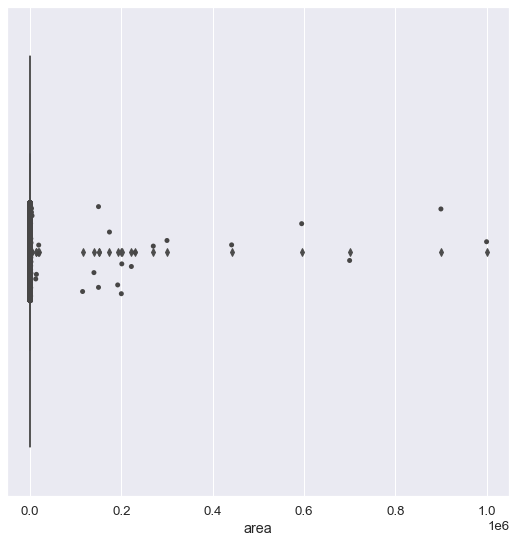

In [83]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

### droping outliers drops 9000 row so we will replace with median

In [84]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\karem\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [85]:
from datasist.structdata import detect_outliers
idx = ['area','price','meterprice','down_payment']
for col in idx:
    outliers_indices = detect_outliers(df, 0, [col])
    col_median = df[col].median()
    df[col].iloc[outliers_indices] = col_median

c:\users\karem\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\karem\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\karem\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [86]:
df['area'].max()

268.0

In [87]:
df['meterprice'].max()

24219.0

In [88]:
df['meterprice'].min()

0.0

boxplot after removing outliers

<AxesSubplot:xlabel='area'>

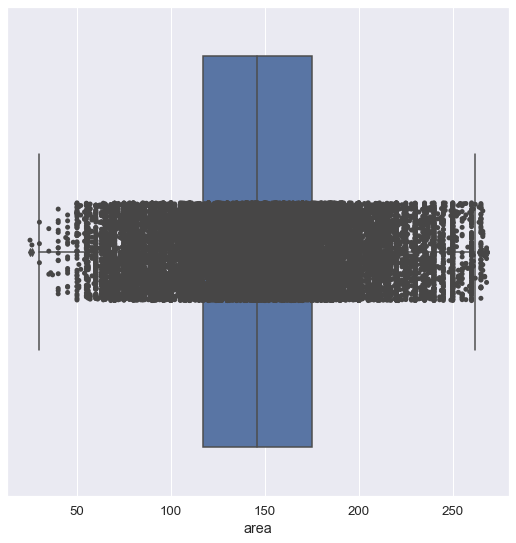

In [89]:
sns.boxplot(x='area', data=df)
sns.stripplot(x='area', data=df, color="#474646")

In [90]:
df

,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000.0,115.0,3,3,...,1,1,1,1,0,0,0,0,3,1521.0
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-04-17,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000.0,115.0,3,1,...,0,0,0,0,0,0,0,0,4,1565.0
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000.0,115.0,3,2,...,0,0,0,0,0,0,0,0,5,1304.0
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-04-29,Gesr Al Suez,Not in Compound,Apartment,450000.0,135.0,3,7,...,0,0,0,0,0,0,0,0,4,3333.0
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000.0,115.0,3,2,...,0,0,0,0,0,0,0,0,5,1391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-01,15 May City,Not in Compound,Apartment,550000.0,125.0,3,2,...,0,0,0,0,0,0,0,0,5,4400.0
37705,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بكمبوند دار مصر دور ثالث,2022-05-01,15 May City,Dar Misr,Apartment,600000.0,140.0,3,3,...,0,0,0,0,0,0,0,0,5,4285.0
37706,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2022-03-01,15 May City,Jewar,Apartment,470000.0,80.0,2,5,...,0,0,0,0,0,0,0,0,3,5875.0
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2022-03-01,15 May City,Not in Compound,Apartment,470000.0,100.0,2,4,...,1,1,0,1,0,0,0,0,3,4700.0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37709 entries, 0 to 37708
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   url                          37709 non-null  object        
 1   title                        37709 non-null  object        
 2   date                         37709 non-null  datetime64[ns]
 3   location                     37709 non-null  object        
 4   compound                     37709 non-null  object        
 5   type                         37709 non-null  object        
 6   price                        37709 non-null  float64       
 7   area                         37709 non-null  float64       
 8   bedrooms                     37709 non-null  object        
 9   level                        37709 non-null  object        
 10  furnished                    37709 non-null  object        
 11  price_type                   37709 non-nu

change furnished and not furnished values to 0 and 1

In [92]:
df['furnished'].replace('No',0,inplace = True)
df['furnished'].replace('Yes',1,inplace = True)

change values of area to numeric                                                                                                                                                                                                                           
make column meter price which is calculation of price over area

In [93]:
df["area"] = [float(str(i).replace(",", "")) for i in df["area"]]
df['area']=df['area'].astype(int)

df['meterprice']=df['price']/df['area']
df['meterprice']=df['meterprice'].astype(int)
df

,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000.0,115,3,3,...,1,1,1,1,0,0,0,0,3,1521
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-04-17,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000.0,115,3,1,...,0,0,0,0,0,0,0,0,4,1565
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000.0,115,3,2,...,0,0,0,0,0,0,0,0,5,1304
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-04-29,Gesr Al Suez,Not in Compound,Apartment,450000.0,135,3,7,...,0,0,0,0,0,0,0,0,4,3333
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000.0,115,3,2,...,0,0,0,0,0,0,0,0,5,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-01,15 May City,Not in Compound,Apartment,550000.0,125,3,2,...,0,0,0,0,0,0,0,0,5,4400
37705,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بكمبوند دار مصر دور ثالث,2022-05-01,15 May City,Dar Misr,Apartment,600000.0,140,3,3,...,0,0,0,0,0,0,0,0,5,4285
37706,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2022-03-01,15 May City,Jewar,Apartment,470000.0,80,2,5,...,0,0,0,0,0,0,0,0,3,5875
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2022-03-01,15 May City,Not in Compound,Apartment,470000.0,100,2,4,...,1,1,0,1,0,0,0,0,3,4700


In [69]:
df = pd.read_csv('New_Data.csv')
df

C:\Users\karem\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,url,title,date,location,compound,type,price,area,bedrooms,level,...,landline,pets_allowed,covered_parking,private_garden,pool,maids_room,central_ac_heating,built_in_kitchen_appliances,month,meterprice
0,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بسكن مصر الاندلس مسلسل 1,2022-03-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,175000,115,3,3,...,1,1,1,1,0,0,0,0,3,1521
1,https://www.olx.com.eg/en/ad/%D8%B3%D9%83%D9%8...,سكن مصر الأندلس مرحله ١ للبيع شقه دور اول ١١٥,2022-04-17,New Cairo - El Tagamoa,Sakan Masr,Apartment,180000,115,3,1,...,0,0,0,0,0,0,0,0,4,1565
2,https://www.olx.com.eg/en/ad/%D9%84%D9%82%D8%B...,لقطه سكن مصر التجمع التالت افر 150 الف,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,150000,115,3,2,...,0,0,0,0,0,0,0,0,5,1304
3,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بمدينة عمر بن الخطاب - آخر جسر السويس,2022-04-29,Gesr Al Suez,Not in Compound,Apartment,450000,135,3,7,...,0,0,0,0,0,0,0,0,4,3333
4,https://www.olx.com.eg/en/ad/%D9%84%D8%B3%D8%B...,لسرعه البيع شقه سكن مصر التجمع التالت,2022-05-01,New Cairo - El Tagamoa,Sakan Masr,Apartment,160000,115,3,2,...,0,0,0,0,0,0,0,0,5,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع إمتداد مدينة 15 مايو مساحة 125م,2022-05-01,15 May City,Not in Compound,Apartment,550000,125,3,2,...,0,0,0,0,0,0,0,0,5,4400
37705,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D8%A...,شقة للبيع بكمبوند دار مصر دور ثالث,2022-05-01,15 May City,Dar Misr,Apartment,600000,140,3,3,...,0,0,0,0,0,0,0,0,5,4285
37706,https://www.olx.com.eg/en/ad/%D8%B4%D9%82%D9%8...,شقه للبيع,2022-03-01,15 May City,Jewar,Apartment,470000,80,2,5,...,0,0,0,0,0,0,0,0,3,5875
37707,https://www.olx.com.eg/en/ad/%D9%84%D9%84%D8%A...,للبيع,2022-03-01,15 May City,Not in Compound,Apartment,470000,100,2,4,...,1,1,0,1,0,0,0,0,3,4700


In [70]:
df.columns

Index(['url', 'title', 'date', 'location', 'compound', 'type', 'price', 'area',
       'bedrooms', 'level', 'furnished', 'price_type', 'bathrooms',
       'payment_option', 'description', 'amenities', 'delivery_term',
       'delivery_date', 'down_payment', 'electricity_meter', 'balcony',
       'water_meter', 'elevator', 'security', 'natural_gas', 'landline',
       'pets_allowed', 'covered_parking', 'private_garden', 'pool',
       'maids_room', 'central_ac_heating', 'built_in_kitchen_appliances',
       'month', 'meterprice'],
      dtype='object')

In [71]:
df['bathrooms']=df['bathrooms'].astype(str)
df['bedrooms']=df['bedrooms'].astype(str)
df['level']=df['level'].astype(str)
df['month']=df['month'].astype(str)


In [72]:
df['bathrooms'].value_counts()

2      15997
1      11664
3       9919
4         91
5         14
8          6
10         6
7          5
6          3
9          2
10+        2
Name: bathrooms, dtype: int64

In [73]:
real=[]
z=0
for i in df['compound'].unique():
    real.append(i)
    z=z+1
real
z

290

In [74]:
x=df['location'].unique()
list(x)
len(x)

39

In [75]:
df2 = df.copy(deep = True)


In [76]:
df['built_in_kitchen_appliances'].value_counts()

0    33717
1     3992
Name: built_in_kitchen_appliances, dtype: int64

In [77]:
x=df.iloc[500]

In [120]:
x[0:]

url                            https://www.olx.com.eg/en/ad/130%D9%85-%D8%A8%...
title                          130م بكمبوند دار مصر القرنفل ناصيه ڤيوو جاردن ...
date                                                                  2022-04-10
location                                                  New Cairo - El Tagamoa
compound                                                                Dar Misr
type                                                                   Apartment
price                                                                     550000
area                                                                         130
bedrooms                                                                       3
level                                                                          3
furnished                                                                      0
price_type                                                        Not Negotiable
bathrooms                   

### Machine learning

### Here we made a feature selection to keep the important features to feed the model with it

In [18]:
df.drop(['url','title', 'date', 'type', 'description', 'amenities','furnished','price_type','maids_room','landline','pets_allowed','covered_parking','central_ac_heating','built_in_kitchen_appliances','delivery_date'], axis=1, inplace=True)
df

,location,compound,price,area,bedrooms,level,bathrooms,payment_option,delivery_term,down_payment,electricity_meter,balcony,water_meter,elevator,security,natural_gas,private_garden,pool,month,meterprice
0,New Cairo - El Tagamoa,Sakan Masr,175000,115,3,3,1,Cash,Core & Shell,0,1,1,1,0,1,1,1,0,3,1521
1,New Cairo - El Tagamoa,Sakan Masr,180000,115,3,1,1,Cash,Finished,0,1,0,1,0,1,1,0,0,4,1565
2,New Cairo - El Tagamoa,Sakan Masr,150000,115,3,2,1,Cash,Finished,0,0,0,0,0,0,0,0,0,5,1304
3,Gesr Al Suez,Not in Compound,450000,135,3,7,1,Cash,Finished,0,0,1,0,1,0,1,0,0,4,3333
4,New Cairo - El Tagamoa,Sakan Masr,160000,115,3,2,1,Cash,Finished,0,0,0,0,0,0,0,0,0,5,1391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,15 May City,Not in Compound,550000,125,3,2,1,Cash,Core & Shell,0,0,1,0,0,0,0,0,0,5,4400
37705,15 May City,Dar Misr,600000,140,3,3,3,Cash,Finished,0,0,0,0,0,0,0,0,0,5,4285
37706,15 May City,Jewar,470000,80,2,5,1,Cash,Finished,0,1,1,1,1,0,1,0,0,3,5875
37707,15 May City,Not in Compound,470000,100,2,4,1,Cash,Finished,0,1,1,1,0,0,0,1,0,3,4700


In [19]:
df = pd.get_dummies(df, columns=['location', 'compound','bedrooms', 'month','level', 'bathrooms','payment_option','delivery_term'], drop_first=True)
df

,price,area,down_payment,electricity_meter,balcony,water_meter,elevator,security,natural_gas,private_garden,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,payment_option_Cash or Installment,payment_option_Installment,delivery_term_Finished,delivery_term_Not Finished,delivery_term_Semi Finished
0,175000,115,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,180000,115,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,150000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,450000,135,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,160000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,550000,125,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37705,600000,140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37706,470000,80,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
37707,470000,100,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
df

,price,area,down_payment,electricity_meter,balcony,water_meter,elevator,security,natural_gas,private_garden,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,payment_option_Cash or Installment,payment_option_Installment,delivery_term_Finished,delivery_term_Not Finished,delivery_term_Semi Finished
0,175000,115,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,180000,115,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,150000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,450000,135,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,160000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,550000,125,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37705,600000,140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37706,470000,80,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
37707,470000,100,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [21]:
x = df.drop('price', axis=1)
y = df['price']

In [80]:
for i in df.columns:
    print(i)

price
area
down_payment
electricity_meter
balcony
water_meter
elevator
security
natural_gas
private_garden
pool
meterprice
location_Abasiya
location_Ain Shams
location_Al Amiriyyah
location_Al Manial
location_Almazah
location_Badr City
location_Basateen
location_Dar al-Salaam
location_Downtown Cairo
location_Ezbet El Nakhl
location_Gesr Al Suez
location_Hadayek Helwan
location_Hadayek al-Kobba
location_Heliopolis
location_Helmeyat El Zaytoun
location_Helwan
location_Katameya
location_Maadi
location_Madinaty
location_Marg
location_Matareya
location_Mokattam
location_Mostakbal City
location_Nasr City
location_New Cairo - El Tagamoa
location_New Capital City
location_New Nozha
location_Obour City
location_Rehab City
location_Salam City
location_Sayeda Zeinab
location_Sheraton
location_Shorouk City
location_Shubra
location_Waili
location_Zahraa Al Maadi
location_Zamalek
location_Zawya al-Hamra
compound_90 Avenue
compound_ABHA
compound_ALBA
compound_AZAD
compound_Abu Al-Hool
compound_Aeon
c

In [27]:
df.isna().sum()

price                                 0
area                                  0
down_payment                          0
electricity_meter                     0
balcony                               0
                                     ..
payment_option_Cash or Installment    0
payment_option_Installment            0
delivery_term_Finished                0
delivery_term_Not Finished            0
delivery_term_Semi Finished           0
Length: 386, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [23]:
x_train

,area,down_payment,electricity_meter,balcony,water_meter,elevator,security,natural_gas,private_garden,pool,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,payment_option_Cash or Installment,payment_option_Installment,delivery_term_Finished,delivery_term_Not Finished,delivery_term_Semi Finished
21890,100,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1792,70,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6524,155,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1
30352,150,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
31448,120,0,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21624,140,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
18972,113,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
18636,245,0,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
11033,120,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [24]:
scaler= StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    #'LR': LinearRegression(),
    'DT': DecisionTreeRegressor(max_depth=200),#max_depth=180
    #'KNN': KNeighborsRegressor(),#n_neighbors=9
    #'SVM': SVR(), #kernel='rbf'
    #'RF': RandomForestRegressor(n_estimators=100,max_depth=6),#n_estimators=200,max_depth=330
    'XGB': XGBRegressor()#n_estimators=200


}

for name, model in models.items():
    print(f'Training {name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'Testing R2: {r2_score(y_test, y_pred)}')
    print('-'*50)

Training DT...
Testing RMSE: 24008.83150491508
Testing MAE: 6795.883220195164
Testing R2: 0.9992218015719478
--------------------------------------------------
Training XGB...
Testing RMSE: 19737.14802690163
Testing MAE: 12272.675389402742
Testing R2: 0.9994740831344648
--------------------------------------------------


### we have chosen DecisionTreeRegressor because R2 is less than XGB

while the accuracy in XGB is better but in this problem ther error here not good


In [27]:
model = DecisionTreeRegressor(max_depth=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Testing R2: {r2_score(y_test, y_pred)}')

Testing RMSE: 24479.47640648003
Testing MAE: 6969.816716164616
Testing R2: 0.9991909924948481


In [28]:
x=df.iloc[500]
print(x)
type(x)

price                                 550000
area                                     130
down_payment                               0
electricity_meter                          0
balcony                                    0
                                       ...  
payment_option_Cash or Installment         0
payment_option_Installment                 1
delivery_term_Finished                     1
delivery_term_Not Finished                 0
delivery_term_Semi Finished                0
Name: 500, Length: 386, dtype: int64


pandas.core.series.Series

In [29]:
x.drop(labels='price',inplace=True)

C:\Users\Commandor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


In [30]:
x = np.array(x)
x = scaler.transform([x])
prediction = model.predict(x)
prediction


array([550000.])

In [31]:
df['price'].iloc[500]


550000

dumb model and scaler to use it in web deployment

In [34]:
import joblib
joblib.dump(scaler, 'scaler.h5')
joblib.dump(model, 'model.h5')
        

['model.h5']

showing why not using XGB

In [38]:
model2 = XGBRegressor()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print(f'Testing RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'Testing MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'Testing R2: {r2_score(y_test, y_pred)}')

Testing RMSE: 19737.14802690163
Testing MAE: 12272.675389402742
Testing R2: 0.9994740831344648


In [39]:
x=df.iloc[500]
type(x)

pandas.core.series.Series

In [40]:
x.drop(labels='price',inplace=True)

C:\Users\Commandor\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(obj)


Here as we see the error is bigger than Decssion Tree

In [41]:
x = np.array(x)

x = scaler.transform([x])

prediction = model2.predict(x)
prediction


array([543951.75], dtype=float32)

In [42]:
df['price'].iloc[500]


550000

In [82]:
columns=list(df.columns)
columns

['price',
 'area',
 'down_payment',
 'electricity_meter',
 'balcony',
 'water_meter',
 'elevator',
 'security',
 'natural_gas',
 'private_garden',
 'pool',
 'meterprice',
 'location_Abasiya',
 'location_Ain Shams',
 'location_Al Amiriyyah',
 'location_Al Manial',
 'location_Almazah',
 'location_Badr City',
 'location_Basateen',
 'location_Dar al-Salaam',
 'location_Downtown Cairo',
 'location_Ezbet El Nakhl',
 'location_Gesr Al Suez',
 'location_Hadayek Helwan',
 'location_Hadayek al-Kobba',
 'location_Heliopolis',
 'location_Helmeyat El Zaytoun',
 'location_Helwan',
 'location_Katameya',
 'location_Maadi',
 'location_Madinaty',
 'location_Marg',
 'location_Matareya',
 'location_Mokattam',
 'location_Mostakbal City',
 'location_Nasr City',
 'location_New Cairo - El Tagamoa',
 'location_New Capital City',
 'location_New Nozha',
 'location_Obour City',
 'location_Rehab City',
 'location_Salam City',
 'location_Sayeda Zeinab',
 'location_Sheraton',
 'location_Shorouk City',
 'location_Shu

values before dummies

In [89]:
y=df2['compound'].unique()
list(y)
len(y)

290

values after dummies

In [90]:
count=0
for i in columns:
    if 'compound' in i:
        count=count+1
count    

289

function to get deployment value truth tables (value code in file dummies.py in folder web deployment)                        

dummies_compound values

In [115]:
ze4=[]
ze4=columns[columns.index('compound_90 Avenue'):columns.index('bedrooms_10')]
comp={}
c=0
for i in ze4:
    x=df[df[i]==1].iloc[0][ze4]
    comp[i]=x.values.tolist()
    c=c+1
comp

{'compound_90 Avenue': [1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

dummies_location values

In [123]:
ze4=[]
ze4=columns[columns.index('location_Abasiya'):columns.index('compound_90 Avenue')]
comp={}
c=0
for i in ze4:
    x=df[df[i]==1].iloc[0][ze4]
    comp[i]=x.values.tolist()
    c=c+1
comp

{'location_Abasiya': [1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'location_Ain Shams': [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'location_Al Amiriyyah': [0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'location_Al Manial': [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'location_Almazah': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [127]:
len(comp['location_Abasiya'])


38

In [128]:
df

,price,area,down_payment,electricity_meter,balcony,water_meter,elevator,security,natural_gas,private_garden,...,bathrooms_5,bathrooms_6,bathrooms_7,bathrooms_8,bathrooms_9,payment_option_Cash or Installment,payment_option_Installment,delivery_term_Finished,delivery_term_Not Finished,delivery_term_Semi Finished
0,175000,115,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,180000,115,0,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,150000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,450000,135,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,160000,115,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37704,550000,125,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37705,600000,140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
37706,470000,80,0,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
37707,470000,100,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [108]:
ze4=[]
ze4=columns[columns.index('delivery_term_Finished'):]
comp={}
c=0
for i in ze4:
    x=df[df[i]==1].iloc[0][ze4]
    comp[i]=x.values.tolist()
    c=c+1
ze4

['delivery_term_Finished',
 'delivery_term_Not Finished',
 'delivery_term_Semi Finished']

In [110]:
ze42=[]
for i in real:
    i="compound_"+i
    ze42.append(i)

In [131]:
df2['location'][0]

'New Cairo - El Tagamoa'

In [111]:
ze42

['compound_Sakan Masr',
 'compound_Not in Compound',
 'compound_Jewar',
 'compound_Andalus',
 'compound_La Verde',
 'compound_Dar Misr',
 'compound_ALBA',
 'compound_Upville',
 'compound_Sama',
 'compound_The City',
 'compound_The Key',
 'compound_L’Avenir',
 'compound_The Village',
 'compound_Zahret El Tagamo',
 'compound_Gardenia',
 'compound_Haram City',
 'compound_Dyar',
 'compound_Sarayat El Kattameya',
 'compound_Nakheel',
 'compound_Madinaty',
 'compound_Paradise',
 'compound_Al Diyar',
 'compound_Greens',
 'compound_Galleria',
 'compound_Amorada',
 'compound_Moon Valley',
 'compound_Dreamland',
 'compound_Jayd',
 'compound_Il Mondo',
 'compound_Eastown',
 'compound_Katameya Plaza',
 'compound_The Address East',
 'compound_The Square',
 'compound_Makany',
 'compound_Fifth Square',
 'compound_Katameya Heights',
 'compound_Al Riyadh Secon',
 'compound_Alma',
 'compound_2020 Compound',
 'compound_The Axis',
 'compound_Light City',
 'compound_Le Jour',
 'compound_Sodic East',
 'comp

difference between list before dummies and list after dummies to get the value with the truth table full of zeros

In [116]:
res = [x for x in ze42 + ze4 if x not in ze42 or x not in ze4]

print(res)

['compound_2020 Compound']


In [ ]:
# df.to_csv (r'New_Data.csv', index = False, header=True,encoding='utf-8') 


In [ ]:
# col1_without = pd.get_dummies(df, columns=['location', 'compound','bedrooms', 'month','level', 'bathrooms','payment_option','delivery_term','delivery_date','price_type']).columns
# list(col1_without)

# col2 = pd.get_dummies(df, columns=['location', 'compound','bedrooms', 'month','level', 'bathrooms','payment_option','delivery_term','delivery_date','price_type'],drop_first=True).columns
# list(col2)

# res=[]
# for i in col1_without:
#     if i not in clo2:
#         res.append(i)

In [ ]:
df.to_csv (r'New_Data.csv', index = False, header=True,encoding='utf-8') 
